<a href="https://colab.research.google.com/github/krishna9734/Fare-Amount-Prediction/blob/main/Fare_Amount_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project title: **Fare Amount Prediction**

## Problem Statement

This case study is to analyse the data and create an efficient model that will estimate the fare prices accurately.

## Dataset Description

*   **key** - a unique identifier for each trip

*   **fare_amount** - the cost of each trip in usd

*   **pickup_datetime** - date and time when the meter was engaged

*   **passenger_count** - the number of passengers in the vehicle (driver entered value)

*   **pickup_longitude** - the longitude where the meter was engaged

*   **pickup_latitude** - the latitude where the meter was engaged

*   **dropoff_longitude** - the longitude where the meter was disengaged

*   **dropoff_latitude** - the latitude where the meter was disengaged

## Importing Essensial Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import pylab

from datetime import datetime as dt
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Importing Dataset

In [2]:
data_set = pd.read_csv('/content/drive/MyDrive/AlmaX mini-project - Fare Amount Prediction/trip.csv')

In [3]:
df = data_set.copy()

In [ ]:
df.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df.columns

Index(['index', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [4]:
df.shape

(200000, 9)

## Data Preprocessing

We can see that the data type of 'pickup_datetime' is object. But according to data defination, 'pickup_datetime' is a datetime stamp variable, which is wrongly interpretated as 'object', so we will convert this variable datatype to 'datetime'.

In [5]:
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x:dt.strptime(x, "%Y-%m-%d %H:%M:%S UTC"))

In [ ]:
df.dtypes

index                         int64
key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [6]:
# We will extract time feature from the 'pickup_datetime'

df = df.assign(hour = df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek)

In [ ]:
df.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [ ]:
df.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,13.491335,15.704670,6.281795,2011.742440,3.048425
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997,6.515531,8.687409,3.438925,1.856397,1.946946
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [7]:
df = df[df['fare_amount']>0] # we will take fare amounts greater than zero
df = df[df['passenger_count']<7] # we will take passengers less than 7
# We will take latitudes between -90 and 90, and longitudes between -180 and 180.

df = df.loc[(df['pickup_longitude']>-180) & (df['pickup_longitude']<180)]
df = df.loc[(df['pickup_latitude']>-90) & (df['pickup_latitude']<90)]
df = df.loc[(df['dropoff_longitude']>-180) & (df['dropoff_longitude']<180)]
df = df.loc[(df['dropoff_latitude']>-90) & (df['dropoff_latitude']<90)]

In [ ]:
df.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
count,1.999640e+05,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000
mean,2.771259e+07,11.362542,-72.501989,39.918044,-72.512550,39.922546,1.683458,13.491653,15.705007,6.282106,2011.742339,3.048419
std,1.601405e+07,9.897195,10.449287,6.130108,10.408993,6.116060,1.306932,6.515340,8.687577,3.438941,1.856318,1.946984
min,1.000000e+00,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,1.382528e+07,6.000000,-73.992065,40.734792,-73.991407,40.733825,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,2.774550e+07,8.500000,-73.981822,40.752590,-73.980092,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,4.155571e+07,12.500000,-73.967155,40.767157,-73.963659,40.768000,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,5.542357e+07,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [8]:
# Let's drop the null values

df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199964 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              199964 non-null  int64         
 1   key                199964 non-null  object        
 2   fare_amount        199964 non-null  float64       
 3   pickup_datetime    199964 non-null  datetime64[ns]
 4   pickup_longitude   199964 non-null  float64       
 5   pickup_latitude    199964 non-null  float64       
 6   dropoff_longitude  199964 non-null  float64       
 7   dropoff_latitude   199964 non-null  float64       
 8   passenger_count    199964 non-null  int64         
 9   hour               199964 non-null  int64         
 10  day                199964 non-null  int64         
 11  month              199964 non-null  int64         
 12  year               199964 non-null  int64         
 13  dayofweek          199964 non-null  int64   

In [9]:
# Let's create a function to calculate the distance from latitude and longtitude

def find_distance(a,b,c,d):
  from geopy.distance import great_circle
  return great_circle((a,b), (c,d)).km

In [ ]:
# Let's check whether our function to calculate distance is working or not.

find_distance(40.790844,-73.976124,40.803349,-73.973082)

1.4138763368796445

In [10]:
# Now creating a new column of distances for each of the trips

df['distance_in_kms'] = df.apply(lambda x: find_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [ ]:
df.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance_in_kms
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683325
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457593
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036384
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661686
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475456


In [11]:
# Now let's drop the columns we don't need such as 'index', 'key', 'pickup_datetime'.

df = df.drop(['index', 'key', 'pickup_datetime'], axis=1)

In [12]:
# We will only keep the observations where travel distance is less than or equal to 130.

df = df.loc[(df['distance_in_kms']>0) & (df['distance_in_kms']<130)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193902 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193902 non-null  float64
 1   pickup_longitude   193902 non-null  float64
 2   pickup_latitude    193902 non-null  float64
 3   dropoff_longitude  193902 non-null  float64
 4   dropoff_latitude   193902 non-null  float64
 5   passenger_count    193902 non-null  int64  
 6   hour               193902 non-null  int64  
 7   day                193902 non-null  int64  
 8   month              193902 non-null  int64  
 9   year               193902 non-null  int64  
 10  dayofweek          193902 non-null  int64  
 11  distance_in_kms    193902 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 19.2 MB


### Outlier Detection

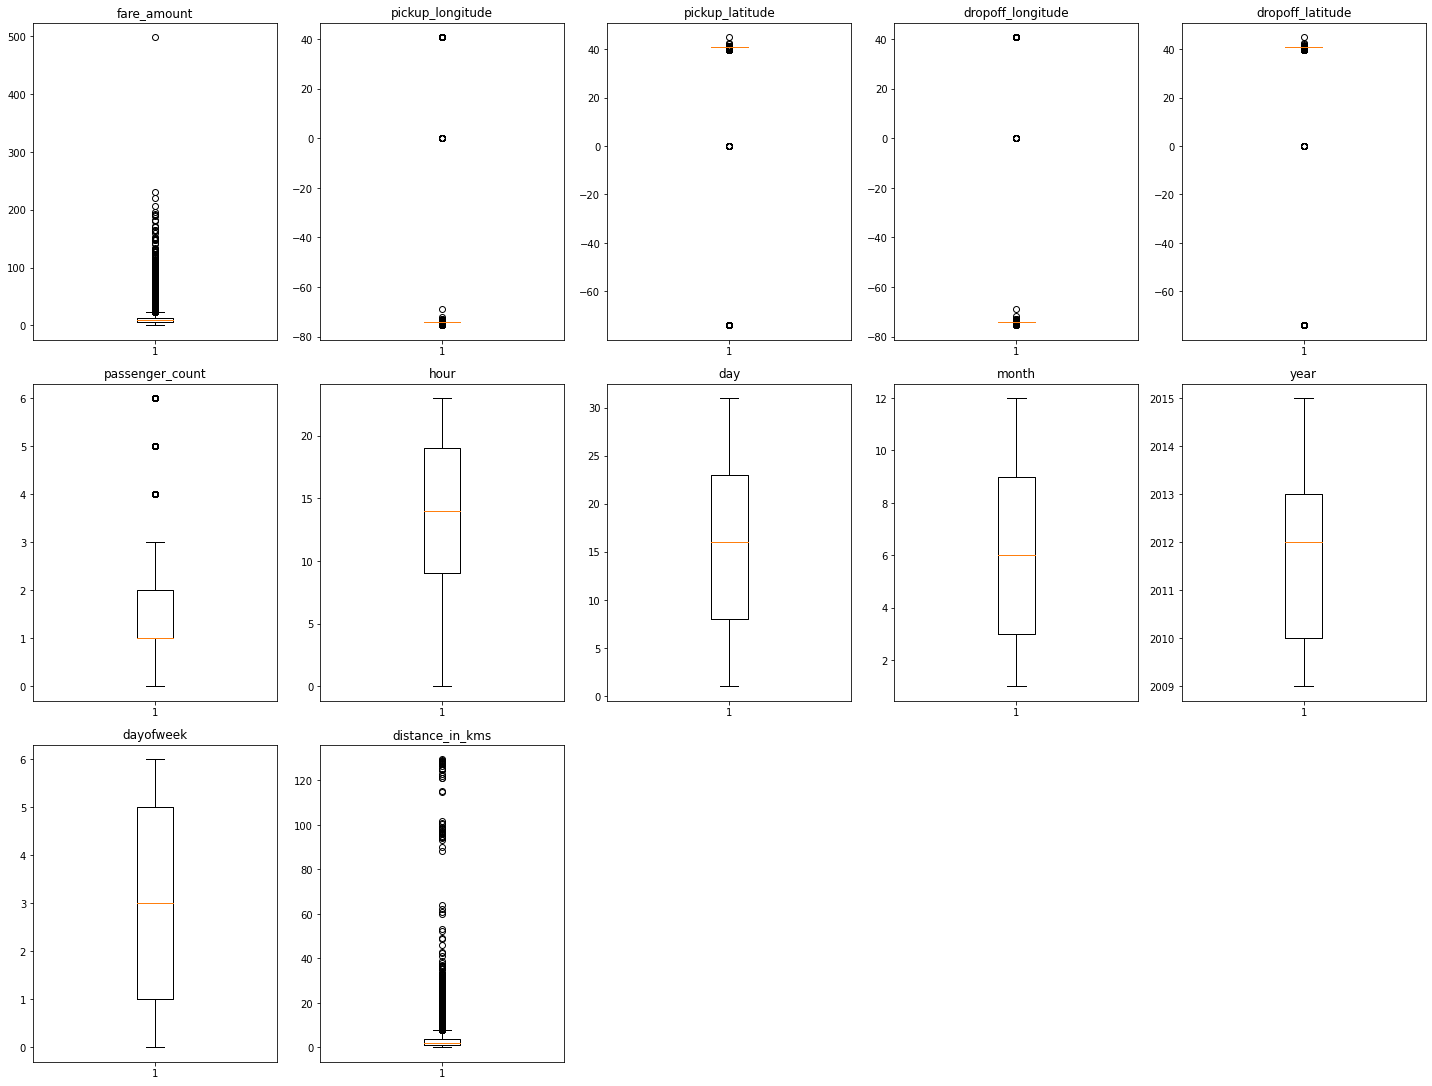

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()  # Let's save the numeric columns in a list

# Outlier detection using boxplots

plt.figure(figsize=(20,30))

for x, var in enumerate(numeric_columns):
  plt.subplot(6, 5, x+1)
  plt.boxplot(df[var], whis=1.5)
  plt.tight_layout()
  plt.title(var)

plt.show()

### Checking Missing Values

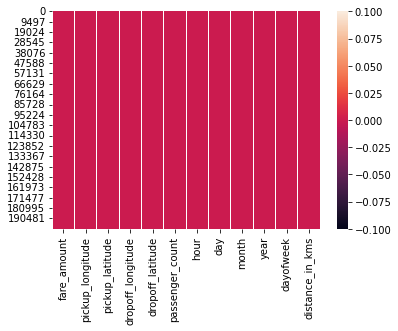

In [ ]:
# Plotting the heatmap to visualize the null values in each column

sns.heatmap(df.isnull())
plt.show()

As we can see from the above plot that there are no missing values in the dataset.

## Exploratory Data Analysis

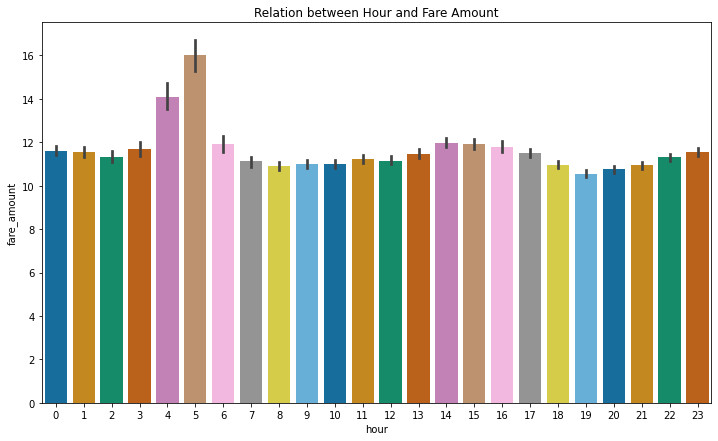

In [ ]:
# PLotting the relation between time and fare amount

plt.figure(figsize=(12,7))
plt.title("Relation between Hour and Fare Amount")
sns.barplot(x=df.hour,y=df.fare_amount,palette="colorblind")
plt.show()

We can see that the morning fare, which is charged between 4 and 5 am, is rather expensive. That could be as a result of fewer cabs being available.

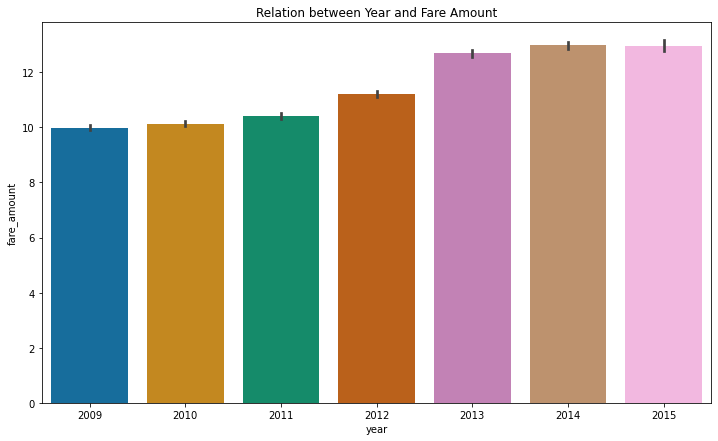

In [ ]:
# Plotting the realtion between Year and Fare Amount

plt.figure(figsize=(12,7))
plt.title("Relation between Year and Fare Amount")
sns.barplot(x=df.year,y=df.fare_amount,palette="colorblind")
plt.show()

It seems that there was a gradual increase in the fare amounts throughout the year between 2009 and 2014, which is quite normal as the cost of living also increased and economic development.

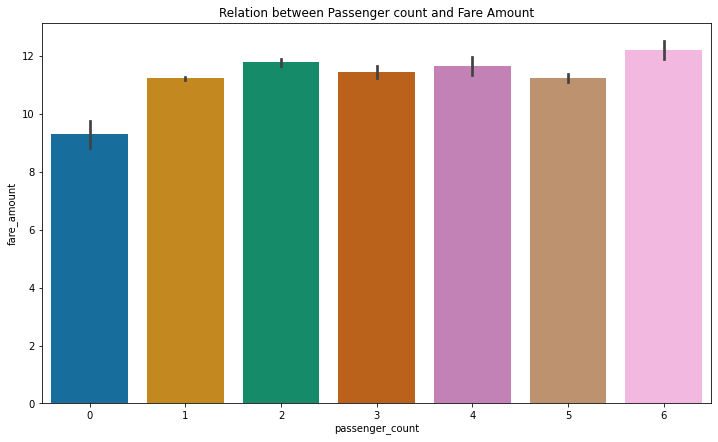

In [ ]:
# Plotting the relation between passenger count and fare amount

plt.figure(figsize=(12,7))
plt.title("Relation between Passenger count and Fare Amount")
sns.barplot(x=df.passenger_count,y=df.fare_amount,palette="colorblind")
plt.show()

Similarity between the fare margins for 2, 4, and 6 persons is evident. But in the case of option number 6, the cost weight per person will be significantly lower.

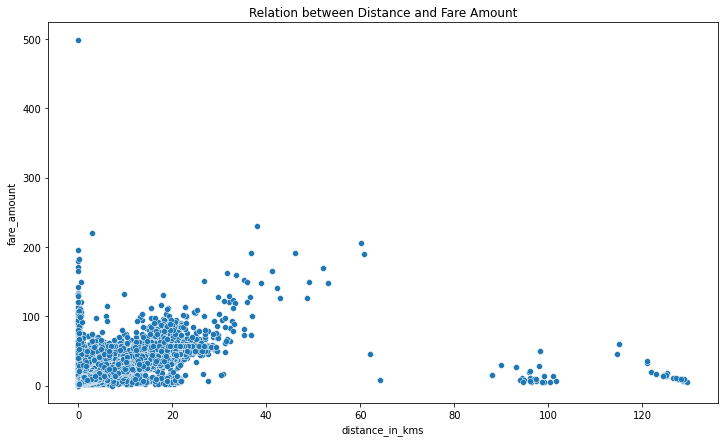

In [ ]:
# Plotting the relation between Distance and fare amount

plt.figure(figsize=(12,7))
plt.title("Relation between Distance and Fare Amount")
sns.scatterplot(x=df.distance_in_kms,y=df.fare_amount,palette="colorblind")
plt.show()

The accompanying plot reveals that there are several outliers, indicating that the fare price is up to 500 even for zero distance, which can be cancelled cases. We do not require fare amounts greater than 250.

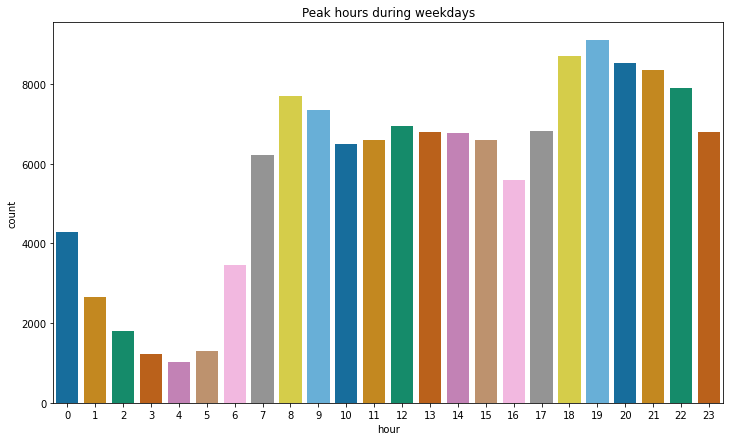

In [ ]:
# Plotting the peak hours during weekdays

plt.figure(figsize=(12,7))
plt.title("Peak hours during weekdays")
sns.countplot(x=df.loc[(df.dayofweek >= 0) & (df.dayofweek <=4)].hour, palette="colorblind")
plt.show()

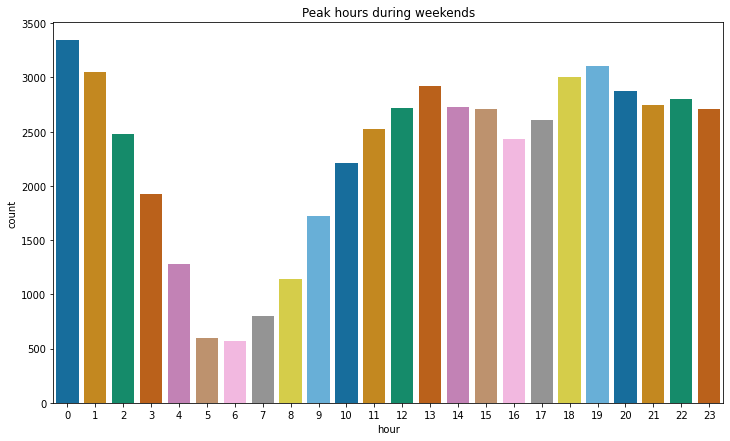

In [ ]:
# Plotting the peak hours during weekends

plt.figure(figsize=(12,7))
plt.title("Peak hours during weekends")
sns.countplot(x=df.loc[(df.dayofweek >= 5) & (df.dayofweek <=6)].hour, palette="colorblind")
plt.show()

We can see from the charts above that the demand for Cab varies between weekdays and weekends. On weekdays, the time between 6 and 8 p.m. is peak, and on weekends, the hour between 12 and 1 a.m. is peak.

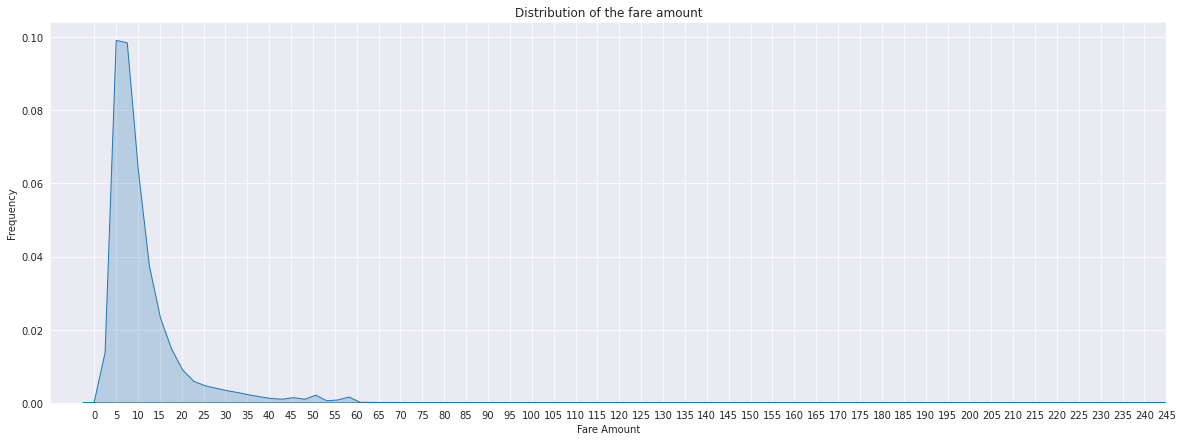

In [ ]:
# Plotting the distribution of "fare_amount"

plt.figure(figsize=(20,7))
sns.set_style("darkgrid")
plt.title("Distribution of the fare amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.xlim(-10,20)
plt.xticks(range(0,250,5))

snsplot = sns.kdeplot(df.fare_amount, shade=True)

We can see that the majority of the journeys have fares ranging from 2 to 20 dollars. There are also a couple minor peaks in 50 and 60 dollars.

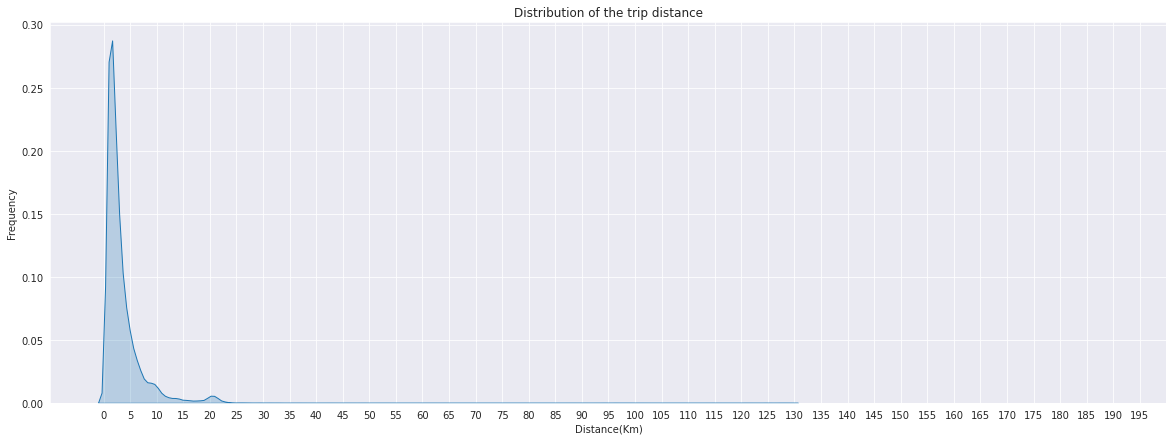

In [ ]:
# Plotting the distribution of "distance_in_kms"

plt.figure(figsize = (20,7))
sns.style = ('darkgrid')
plt.title("Distribution of the trip distance")
plt.xlabel("Distance(Km)")
plt.ylabel("Frequency")
plt.xlim(-10, 200)
plt.xticks(range(0,200,5))

sns.plot = sns.kdeplot(df.distance_in_kms, shade=True)

We can see that the majority of the journeys cover a distance between 2 and 25 kilometres. There are also few occurrences of 0 kilometres.

In [ ]:
# Checking the correlation plot between features

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance_in_kms
fare_amount,1.000000,0.011741,-0.008548,0.010256,-0.008366,0.012820,-0.020723,0.000033,0.024203,0.120469,0.006518,0.790549
pickup_longitude,0.011741,1.000000,-0.993987,0.999875,-0.993960,0.009748,0.001841,0.019523,-0.007478,0.013446,0.008239,0.005131
pickup_latitude,-0.008548,-0.993987,1.000000,-0.993983,0.999916,-0.009909,-0.000982,-0.020052,0.008022,-0.014443,-0.008954,-0.002525
dropoff_longitude,0.010256,0.999875,-0.993983,1.000000,-0.993946,0.009744,0.000949,0.019544,-0.007444,0.013341,0.008527,0.004105
dropoff_latitude,-0.008366,-0.993960,0.999916,-0.993946,1.000000,-0.009864,-0.001021,-0.020076,0.007993,-0.014353,-0.008916,-0.002281
passenger_count,0.012820,0.009748,-0.009909,0.009744,-0.009864,1.000000,0.014867,0.002659,0.009277,0.006276,0.036764,0.006057
hour,-0.020723,0.001841,-0.000982,0.000949,-0.001021,0.014867,1.000000,0.005368,-0.004226,0.001871,-0.086208,-0.027415
day,0.000033,0.019523,-0.020052,0.019544,-0.020076,0.002659,0.005368,1.000000,-0.017042,-0.012317,0.005010,-0.001142
month,0.024203,-0.007478,0.008022,-0.007444,0.007993,0.009277,-0.004226,-0.017042,1.000000,-0.115492,-0.008915,0.008034
year,0.120469,0.013446,-0.014443,0.013341,-0.014353,0.006276,0.001871,-0.012317,-0.115492,1.000000,0.006002,0.019288


As longitudes and latitudes are locational angles, so we will not consider the correlations between them. Otherwise, there is no signification correlation between features can be seen. There is a positive correlation between "distance_in_kms" and "fare_amount" which is fair in nature.

## Feature Engineering

In [13]:
# As decided earlier we will limit the fare amount upto 250 dollars
df = df[df["fare_amount"]<250]

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance_in_kms
count,193901.000000,193901.000000,193901.000000,193901.000000,193901.000000,193901.000000,193901.000000,193901.000000,193901.000000,193901.000000,193901.000000,193901.000000
mean,11.345393,-73.910608,40.688506,-73.909648,40.688785,1.683844,13.488161,15.704751,6.281561,2011.745035,3.049118,3.377478
std,9.668994,2.684884,2.629177,2.684968,2.629504,1.307044,6.515524,8.687960,3.440456,1.860073,1.946672,3.975606
min,0.010000,-75.419276,-74.015515,-75.423067,-74.015750,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000084
25%,6.000000,-73.992279,40.736438,-73.991600,40.735303,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000,1.280068
50%,8.500000,-73.982128,40.753290,-73.980567,40.753735,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000,2.179958
75%,12.500000,-73.968455,40.767532,-73.965508,40.768327,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000,3.939378
max,230.000000,40.808425,45.031653,40.831932,45.031598,6.000000,23.000000,31.000000,12.000000,2015.000000,6.000000,129.610277


In [14]:
# Storing the target variable 'fare_amount' in dataframe 'y'
y = pd.DataFrame(df['fare_amount'])

# Storing the independent variables in dataframe 'x'
x = df.drop('fare_amount',axis = 1)

In [15]:
# Splitting the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [16]:
# printing dimension of predictors train set
print("The shape of X_train is:",x_train.shape)

# printing dimension of predictors test set
print("The shape of X_test is:",x_test.shape)

# printing dimension of target train set
print("The shape of y_train is:",y_train.shape)

# printing dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (155120, 11)
The shape of X_test is: (38781, 11)
The shape of y_train is: (155120, 1)
The shape of y_test is: (38781, 1)


## Modeling

### Linear Regression

In [17]:
# Fitting onto Linear regression Model 

reg= LinearRegression().fit(x_train, y_train)

In [18]:
lin_reg_pred = reg.predict(x_test)

In [21]:
# Printing predicted fare amounts
[x for x in list(lin_reg_pred)]

[array([4.82973405]),
 array([12.94024282]),
 array([8.38894462]),
 array([5.80962918]),
 array([9.77864922]),
 array([9.95692113]),
 array([10.96846377]),
 array([4.90500863]),
 array([7.1651727]),
 array([8.09484666]),
 array([8.2557885]),
 array([5.70088296]),
 array([17.11065175]),
 array([23.80616022]),
 array([5.26902481]),
 array([16.58492904]),
 array([7.42124159]),
 array([7.11983482]),
 array([8.31441639]),
 array([6.32203057]),
 array([10.03931607]),
 array([9.00407858]),
 array([5.99372796]),
 array([15.77455114]),
 array([10.15875874]),
 array([8.702177]),
 array([15.28912221]),
 array([10.26805767]),
 array([14.50644694]),
 array([3.14300111]),
 array([11.95184875]),
 array([7.52767172]),
 array([11.11428276]),
 array([8.9281267]),
 array([7.96288984]),
 array([47.72186527]),
 array([10.72948905]),
 array([6.16873564]),
 array([7.68095894]),
 array([6.54160346]),
 array([6.90788584]),
 array([7.13585383]),
 array([5.86906941]),
 array([11.19778801]),
 array([5.81176109]),

### Decision Tree Regression

In [22]:
decision_tree = DecisionTreeRegressor(criterion = 'mse', random_state = 10)

# fitting the model using fit() on train data
decision_tree.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', random_state=10)

In [23]:
dt_reg_pred = decision_tree.predict(x_test)

In [24]:
# Printing predicted fare amounts
[x for x in list(dt_reg_pred)]

[4.9,
 14.5,
 14.5,
 4.1,
 10.5,
 10.0,
 10.9,
 4.1,
 7.7,
 4.5,
 6.5,
 4.9,
 12.5,
 15.0,
 5.7,
 27.450000000000006,
 5.3,
 14.1,
 5.3,
 5.7,
 10.0,
 8.5,
 5.7,
 10.5,
 9.5,
 6.9,
 13.0,
 8.9,
 12.9,
 4.5,
 10.5,
 5.3,
 11.5,
 7.0,
 11.5,
 49.57,
 8.5,
 6.5,
 6.1,
 4.1,
 4.9,
 3.5,
 8.9,
 11.3,
 4.5,
 12.1,
 10.9,
 5.5,
 9.3,
 4.5,
 9.3,
 12.0,
 11.7,
 6.0,
 9.0,
 6.1,
 13.7,
 30.5,
 14.5,
 6.5,
 9.5,
 7.0,
 4.5,
 8.9,
 30.0,
 3.7,
 10.5,
 45.5,
 8.1,
 6.5,
 28.0,
 5.3,
 19.3,
 4.5,
 14.1,
 5.0,
 6.1,
 5.0,
 6.9,
 4.9,
 4.5,
 6.0,
 5.5,
 8.9,
 7.0,
 10.1,
 9.7,
 6.5,
 4.1,
 8.9,
 10.5,
 25.7,
 57.54,
 6.1,
 3.0,
 7.3,
 10.1,
 10.1,
 11.7,
 11.5,
 9.7,
 8.1,
 31.5,
 46.0,
 4.0,
 33.0,
 4.5,
 6.9,
 5.5,
 17.7,
 6.5,
 18.1,
 6.1,
 4.0,
 12.1,
 11.3,
 10.0,
 11.3,
 8.5,
 8.5,
 12.1,
 15.5,
 5.5,
 6.5,
 6.9,
 37.45,
 8.0,
 11.7,
 57.33,
 14.0,
 14.9,
 7.0,
 15.0,
 57.83,
 9.0,
 21.0,
 7.3,
 8.0,
 45.0,
 8.5,
 8.0,
 12.9,
 32.5,
 15.0,
 14.5,
 15.5,
 7.3,
 4.9,
 9.5,
 15.3,
 10.5,
 9.3,
 15

### Random Forest Regression

In [25]:
# Instantiating the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fitting the regressor with training dataset
rf_reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(random_state=10)

In [26]:
# predicting the values on test dataset
rf_reg_pred = rf_reg.predict(x_test)

In [27]:
# Printing predicted fare amounts
[x for x in list(rf_reg_pred)]

[4.5760000000000005,
 12.296999999999995,
 6.985,
 4.576000000000001,
 11.360999999999997,
 9.66,
 11.675000000000002,
 3.903999999999999,
 7.787999999999999,
 6.66,
 7.441999999999999,
 5.557999999999998,
 16.645,
 23.796599999999998,
 6.137000000000001,
 26.1527,
 6.502000000000001,
 9.0777,
 8.277999999999995,
 5.901,
 9.0314,
 8.801999999999998,
 5.635999999999998,
 15.159,
 9.410300000000001,
 8.204,
 13.855,
 9.778000000000002,
 13.226,
 8.863199999999999,
 11.04,
 5.885,
 11.225,
 6.31,
 7.015,
 49.13360000000001,
 8.617000000000003,
 6.985,
 7.5620000000000065,
 4.297000000000002,
 6.119999999999999,
 4.541999999999999,
 7.8777000000000035,
 10.360999999999999,
 5.3759999999999994,
 9.473800000000002,
 10.632,
 5.36,
 9.680000000000001,
 5.817999999999997,
 9.4347,
 8.648000000000001,
 11.810999999999996,
 5.98,
 8.84,
 6.351999999999999,
 10.481000000000002,
 15.931999999999993,
 12.91599999999999,
 5.888,
 11.88,
 7.23,
 4.578000000000001,
 8.995999999999997,
 27.153299999999

In [28]:
# Now checking x_train shape before proceeding
x_train.shape

(155120, 11)

In [29]:
# calculating rmse using rmse()
actual_fare = y_test["fare_amount"]
lin_reg_rmse = mean_squared_error(y_true=actual_fare, y_pred=lin_reg_pred, squared=False)
dt_reg_rmse = mean_squared_error(y_true=actual_fare, y_pred=dt_reg_pred, squared=False)
rf_reg_rmse = mean_squared_error(y_true=actual_fare, y_pred=rf_reg_pred, squared=False)

# calculating R-squared using rsquared
lin_reg_rsquared = reg.score(x_train,y_train)
dt_reg_rsquared = decision_tree.score(x_train,y_train)
rf_reg_rsquared = rf_reg.score(x_train,y_train)

# Number of observation or sample size
n = 155120 

# No of independent variables
p = 11

# calculating Adjusted R-Squared using rsquared_adj
lin_reg_Adj_rsquared = 1 - (1-lin_reg_rsquared)*(n-1)/(n-p-1)
dt_reg_Adj_rsquared = 1 - (1-dt_reg_rsquared)*(n-1)/(n-p-1)
rf_reg_Adj_rsquared = 1 - (1-rf_reg_rsquared)*(n-1)/(n-p-1)

In [30]:
# creating a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# creating a empty dataframe of the columns
score_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
lin_reg_metrics = pd.Series({'Model': "Linear Regression",
                              'RMSE':lin_reg_rmse,
                              'R-Squared': lin_reg_rsquared,
                              'Adj. R-Squared': lin_reg_Adj_rsquared})
dt_reg_metrics = pd.Series({'Model': "Decision Tree",
                              'RMSE':dt_reg_rmse,
                              'R-Squared': dt_reg_rsquared,
                              'Adj. R-Squared': dt_reg_Adj_rsquared})
rf_reg_metrics = pd.Series({'Model': "Random Forest",
                              'RMSE':rf_reg_rmse,
                              'R-Squared': rf_reg_rsquared,
                              'Adj. R-Squared': rf_reg_Adj_rsquared})

# appending our result into dataframe
score_tabulation = score_tabulation.append(lin_reg_metrics, ignore_index = True)
score_tabulation = score_tabulation.append(dt_reg_metrics, ignore_index = True)
score_tabulation = score_tabulation.append(rf_reg_metrics, ignore_index = True)

In [31]:
# Printing comparision table between all implemented models
score_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linear Regression,5.523787,0.639864,0.639838
1,Decision Tree,5.114143,1.000000,1.000000
2,Random Forest,3.531733,0.978859,0.978858
